In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-whitegrid")

# Display more cols
pd.set_option("display.max_columns", 500)

### 1. Load data
- Load file `superstore_sales.xls` vào biến `df`

In [2]:
df = pd.read_excel("superstore_sales.xls")

### 2. Inspect data

- Show 3 dòng đầu

In [3]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


- Show 3 dòng cuối

In [4]:
df.tail(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


- Data có bao nhiêu dòng, bao nhiêu cột?

In [5]:
df.shape

(9994, 21)

- In ra list tên các cột

In [6]:
df.columns.tolist()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

- Kiểu dữ liệu của từng cột

In [7]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

### 3. Transform cột


#### 3.1. Đổi tên cột

- Biến tên cột về dạng chữ thường và snake_case

In [8]:
cols = [re.sub("[ -]", "_", x).lower() for x in df.columns]
df.columns = cols

- In ra 1 dòng đầu để kiểm tra

In [9]:
df.head(1)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


#### 3.2. Đổi về datetime

- Chọn ra cột mà tên có chứa `date` và kiểm tra dtype của chúng

In [10]:
df.filter(regex="date").dtypes

order_date    datetime64[ns]
ship_date     datetime64[ns]
dtype: object

- Nếu chưa ở dạng datetime thì đổi thành datetime

In [11]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["ship_date"] = pd.to_datetime(df["ship_date"])

- Kiểm tra kết quả sau khi đổi (run lại câu lệnh trên cùng)

### 4. Trả lời các câu hỏi khác

#### 4.1. Distinct values

- Có bao nhiêu nước và là những nước nào?

In [12]:
df["country"].nunique()

1

In [13]:
df["country"].unique().tolist()

['United States']

- Có bao nhiêu categories và là những categories nào?

In [14]:
df["category"].unique().tolist()

['Furniture', 'Office Supplies', 'Technology']

- Có bao nhiêu subcategories và là những subcategories nào?

In [15]:
df["sub_category"].nunique()

17

- Tương tự có bao nhiêu `city`, `region`, `state`, `ship_mode`, `segment`

In [16]:
for x in ["city", "region", "state"]:
    print("{}: {}".format(x, df[x].nunique()))
#     print("{}: {}".format(x, df[x].nunique()))

city: 531
region: 4
state: 49


#### 4.2. Làm việc với ngày tháng

- Data chứa các order trong khoảng thời gian nào?

In [17]:
df["order_date"].agg(["min", "max"])

min   2014-01-03
max   2017-12-30
Name: order_date, dtype: datetime64[ns]

- Mỗi năm có bao nhiêu order (sắp xếp theo thứ tự các năm tăng dần)?

- Co cot year
- Group by year
- Count
- Sort theo year

In [18]:
df["order_year"] = df["order_date"].dt.year

In [19]:
df.groupby("order_year").size().sort_index()

order_year
2014    1993
2015    2102
2016    2587
2017    3312
dtype: int64

- Vẽ đồ thị cho thống kê trên

In [20]:
data = df.groupby("order_year").size().sort_index()

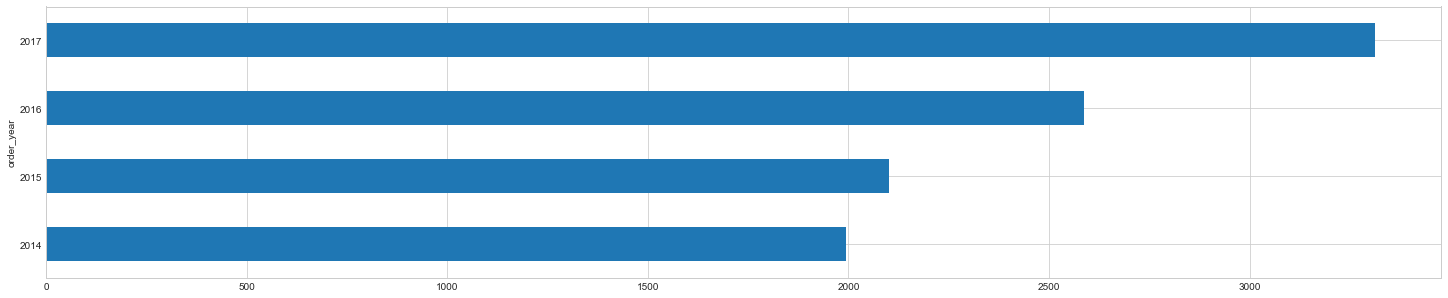

In [21]:
fig, ax = plt.subplots(figsize=(25, 5))
data.plot.barh(ax=ax)
plt.show()

- Mỗi tháng có bao nhiêu order?

In [22]:
df["order_month"] = df["order_date"].dt.month

In [23]:
data = df.groupby(["order_year", "order_month"]).size()\
    .sort_index().reset_index()\
    .rename(columns={0: "n_orders"})

data.head(5)

,order_year,order_month,n_orders
0,2014,1,79
1,2014,2,46
2,2014,3,157
3,2014,4,135
4,2014,5,122


In [24]:
df["order_ym"] = df["order_date"].astype(str).str[:7]

In [25]:
data = df.groupby("order_ym").size()\
    .sort_index()

data.head(5)

order_ym
2014-01     79
2014-02     46
2014-03    157
2014-04    135
2014-05    122
dtype: int64

- Vẽ plot cho data trên (bar, line)

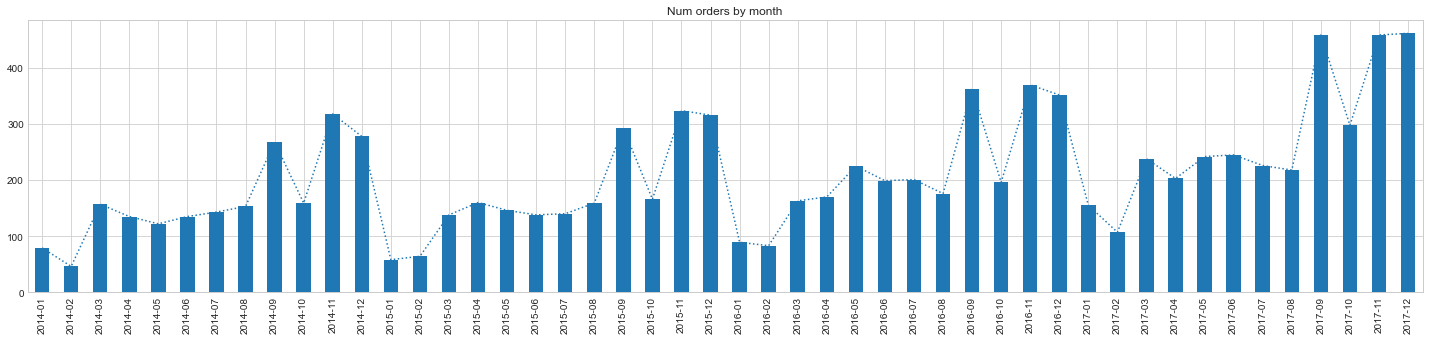

In [26]:
# Intro
fig, ax = plt.subplots(figsize=(25, 5))

# Plot data
data.plot.line(linestyle="dotted", ax=ax)
data.plot.bar(ax=ax)

# Decorate
ax.set_title("Num orders by month")
ax.set_xlabel(None)

# Conclusion
plt.show()

- Vẽ barplot như trên nhưng alternate màu của 2 năm liên tiếp

In [27]:
df["order_year_odd"] = df["order_year"].apply(lambda x: int(x) % 2)

In [28]:
data = df.groupby(["order_ym", "order_year_odd"]).size()\
    .sort_index().reset_index()\
    .rename(columns={0: "n_orders"})

data.head(5)

,order_ym,order_year_odd,n_orders
0,2014-01,0,79
1,2014-02,0,46
2,2014-03,0,157
3,2014-04,0,135
4,2014-05,0,122


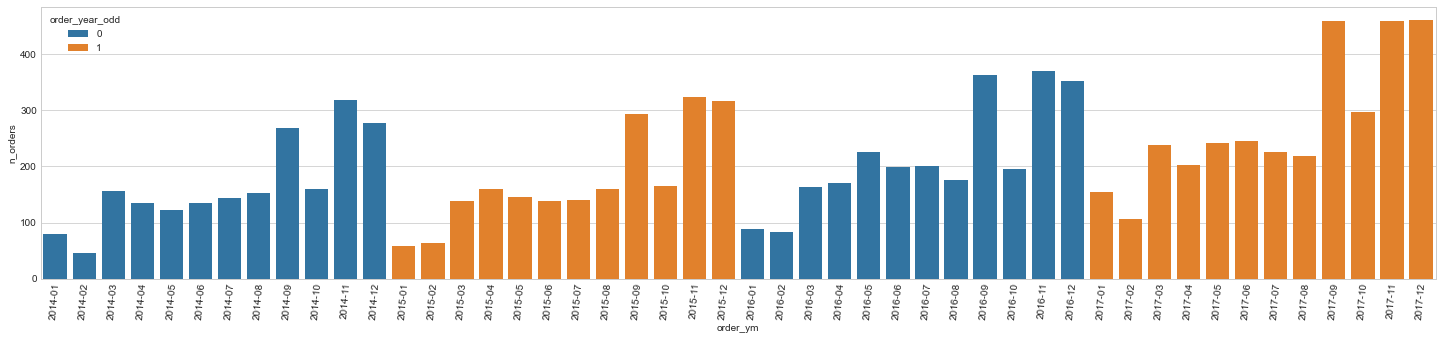

In [29]:
# Intro
fig, ax = plt.subplots(figsize=(25, 5))

# Plot data
sns.barplot(
    x="order_ym",
    y="n_orders",
    hue="order_year_odd",
    dodge=False,
    data=data,
    ax=ax
)

# Decoration
xticks = data["order_ym"].tolist()
ax.set_xticklabels(xticks, rotation=85)

# Conclusion
plt.show()

- Như yêu cầu trên nhưng vẽ line plot

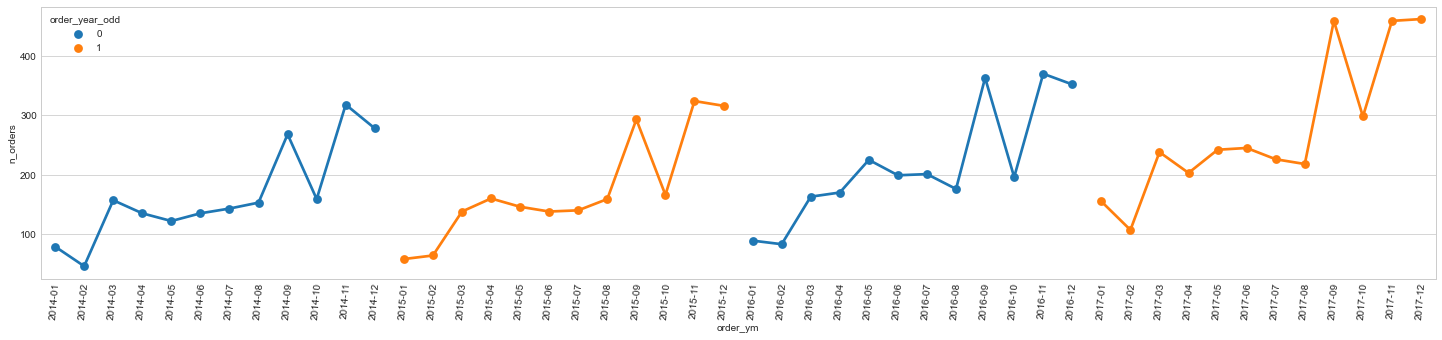

In [30]:
# Intro
fig, ax = plt.subplots(figsize=(25, 5))

# Plot data
sns.pointplot(
    x="order_ym",
    y="n_orders",
    hue="order_year_odd",
    dodge=False,
    data=data,
    ax=ax
)

# Decoration
xticks = data["order_ym"].tolist()
ax.set_xticklabels(xticks, rotation=85)

# Conclusion
plt.show()

### 4.3. Doanh thu

- Lấy ra các đơn hàng của năm 2017

In [31]:
data_2017 = df.loc[df['order_year'] == 2017, :].copy()

- Có bao nhiêu đơn hàng?

In [32]:
data_2017.shape

(3312, 25)

In [33]:
data_2017.head(3)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,order_year,order_month,order_ym,order_year_odd
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,2017,4,2017-04,1
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,2017,7,2017-07,1
34,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,2017,10,2017-10,1


- Số đơn hàng mỗi tháng?

In [34]:
data_2017.groupby("order_ym").size()\
    .sort_index()

order_ym
2017-01    155
2017-02    107
2017-03    238
2017-04    203
2017-05    242
2017-06    245
2017-07    226
2017-08    218
2017-09    459
2017-10    298
2017-11    459
2017-12    462
dtype: int64

- Lấy ra top 10 sản phẩm có doanh số cao nhất 2017

In [35]:
data_2017.groupby(['product_id','product_name'])['sales'].sum()\
                                            .reset_index()\
                                                .nlargest(10,'sales')['product_name']\
                                                    .tolist()

['Canon imageCLASS 2200 Advanced Copier',
 'Martin Yale Chadless Opener Electric Letter Opener',
 'GBC DocuBind TL300 Electric Binding System',
 'Hewlett Packard LaserJet 3310 Copier',
 'Samsung Galaxy Mega 6.3',
 'Cubify CubeX 3D Printer Triple Head Print',
 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind',
 'HON 5400 Series Task Chairs for Big and Tall',
 'GBC DocuBind P400 Electric Binding System',
 'Lexmark MX611dhe Monochrome Laser Printer']

In [36]:
plot_data_2017 = data_2017.groupby(['product_id','product_name'])['sales'].sum()\
                                            .reset_index()\
                                                .nlargest(10,'sales')

<AxesSubplot:xlabel='sales', ylabel='product_name'>

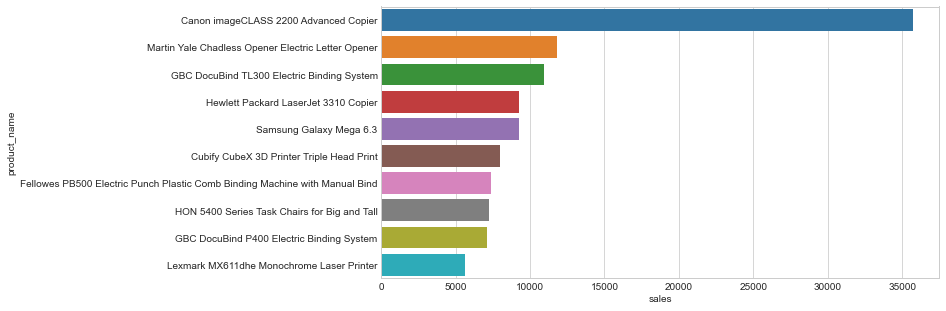

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(
    x = 'sales',
    y = 'product_name',
    data = plot_data_2017,
    orient = "h",
    ax = ax
)

- Lấy ra top 10 như trên nhưng tô màu theo category

<AxesSubplot:xlabel='sales', ylabel='product_name'>

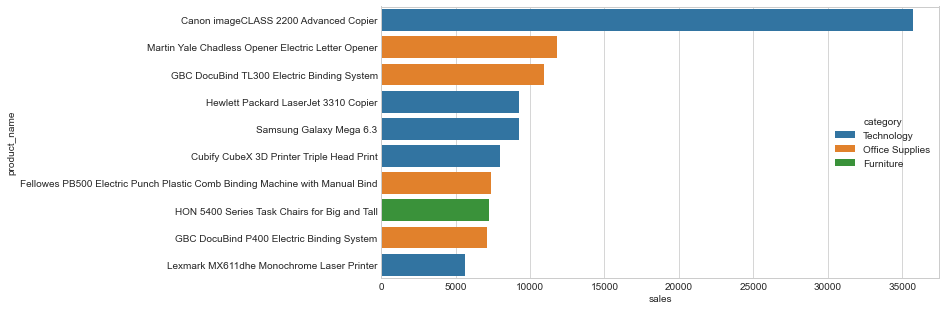

In [38]:
plot_data_2017 = data_2017.groupby(['product_id','product_name','category'])['sales'].sum()\
                                            .reset_index()\
                                                .nlargest(10,'sales')

fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(
    x = 'sales',
    y = 'product_name',
    data = plot_data_2017,
    orient = "h",
    hue = 'category',
    dodge = False,
    ax = ax
)

- Lọc ra top 5 sub-categories có Sales nhiều nhất trong năm 2017

In [39]:
top5_sub_categories_2017 = data_2017.groupby('sub_category')['sales'].sum()\
                                                                    .nlargest(5)\
                                                                        .reset_index()

top5_sub_categories_2017

,sub_category,sales
0,Phones,105340.516
1,Chairs,95554.353
2,Binders,72788.045
3,Storage,69677.618
4,Copiers,62899.388


- Vẽ barplot cho sales của 5 sub-categories theo từng năm từ năm 2014-2017

In [56]:
top5 = data_2017.groupby('sub_category')['sales'].sum()\
                                                        .nlargest(5)\
                                                            .reset_index()['sub_category'].to_list()

top5_plot_data = df.loc[df['sub_category'].isin(top5), :]

In [57]:
plot_data = top5_plot_data.groupby(['sub_category','order_year'])['sales'].sum().reset_index()

In [58]:
plot_data

,sub_category,order_year,sales
0,Binders,2014,43488.265
1,Binders,2015,37453.098
2,Binders,2016,49683.325
3,Binders,2017,72788.045
4,Chairs,2014,77241.576
5,Chairs,2015,71734.529
6,Chairs,2016,83918.645
7,Chairs,2017,95554.353
8,Copiers,2014,10849.782
9,Copiers,2015,26179.450


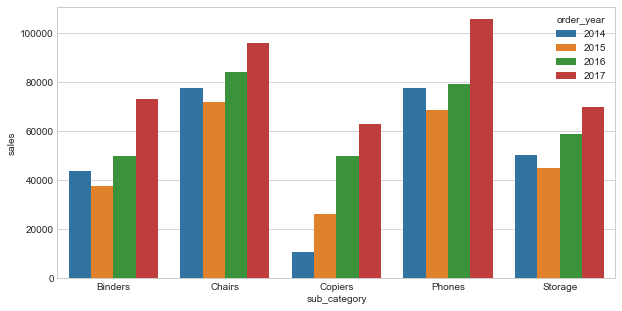

In [59]:
# Intro
fig, ax = plt.subplots(figsize=(10, 5))

# Plot data
sns.barplot(
    x= "sub_category",
    y= "sales",
    hue ="order_year",
    data =plot_data,
    ax=ax
)


# Conclusion
plt.show()

- Vẽ boxplot của doanh số daily từng category theo các năm

In [89]:
plot_data = df.groupby(['category','order_year','order_date'])['sales']\
    .sum().reset_index()

In [93]:
def plot_boxplot(data, ax):
    sns.boxplot(
        x= "category",
        y= "sales",
        data = data,
        showfliers = False,
        ax= ax
    )

In [94]:
plot_data_14 = plot_data.loc[plot_data["order_year"] == 2014, :]
plot_data_15 = plot_data.loc[plot_data["order_year"] == 2015, :]
plot_data_16 = plot_data.loc[plot_data["order_year"] == 2016, :]
plot_data_17 = plot_data.loc[plot_data["order_year"] == 2017, :]

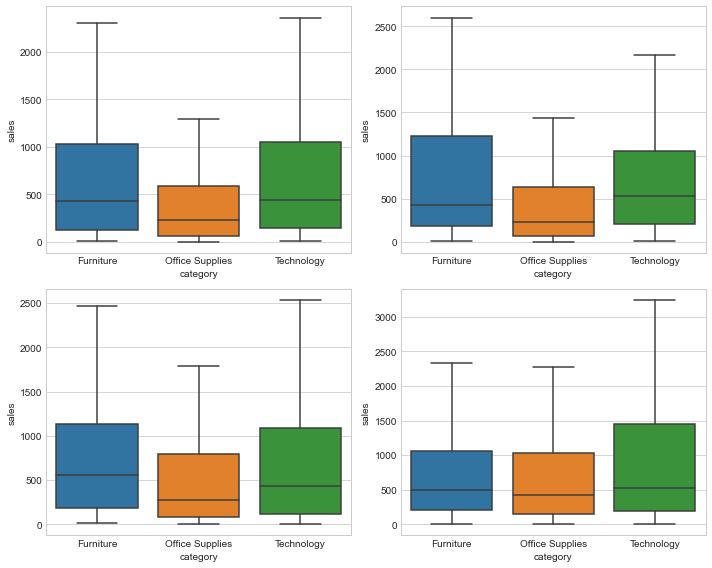

In [96]:
# Intro
fig, ax = plt.subplots(2, 2, figsize=(10, 8 ))

# Plot data
plot_boxplot(plot_data_14, ax[0,0])
plot_boxplot(plot_data_15, ax[0,1])
plot_boxplot(plot_data_16, ax[1,0])
plot_boxplot(plot_data_17, ax[1,1])


plt.tight_layout()
plt.show()

- Vẽ KDE của doanh số daily từng category theo các năm

In [97]:
plot_data['order_year'] = plot_data['order_year'].astype(str)

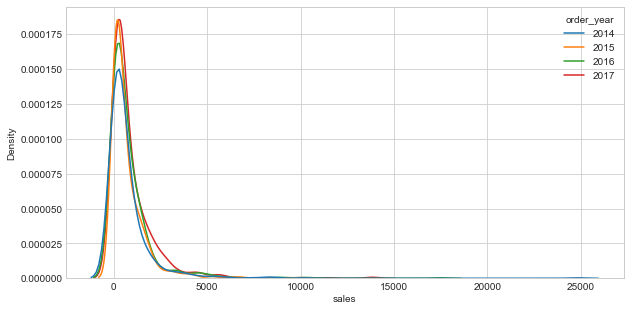

In [99]:
# Intro
fig, ax = plt.subplots(figsize=(10, 5))

# Plot data
sns.kdeplot(
    #x= "sub_category",
    x= "sales",
    hue ="order_year",
    data =plot_data,
    ax=ax
)


# Conclusion
plt.show()

- Vẽ daily sales against daily quantity

In [101]:
plot_data = df.groupby("order_date")[['sales','quantity']].sum()

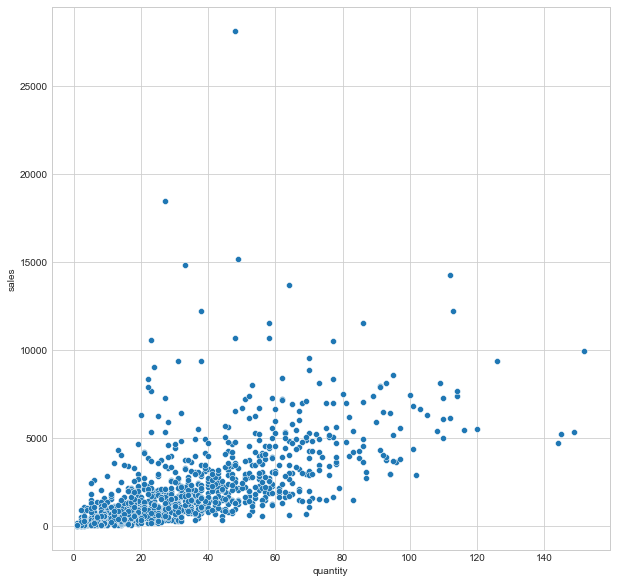

In [106]:
fig, ax = plt.subplots(figsize = (10,10))

sns.scatterplot(
    x = 'quantity',
    y = 'sales',
    data = plot_data,
    ax = ax
)

plt.show()

- Vẽ daily sales against daily quantity (từ category ra riêng từng subplots)

In [112]:
plot_data = df.groupby(["order_date","category"])[['sales','quantity']].sum().reset_index()

In [113]:
plot_data

,order_date,category,sales,quantity
0,2014-01-03,Office Supplies,16.448,2
1,2014-01-04,Office Supplies,288.060,8
2,2014-01-05,Office Supplies,19.536,3
3,2014-01-06,Furniture,2573.820,9
4,2014-01-06,Office Supplies,685.340,15
...,...,...,...,...
2856,2017-12-29,Office Supplies,282.440,12
2857,2017-12-29,Technology,302.376,3
2858,2017-12-30,Furniture,323.136,4
2859,2017-12-30,Office Supplies,299.724,12


In [117]:
plot_data['category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [119]:
plot_data_1 = plot_data.loc[plot_data['category'] == 'Office Supplies', :]
plot_data_2 = plot_data.loc[plot_data['category'] == 'Furniture', :]
plot_data_3 = plot_data.loc[plot_data['category'] == 'Technology', :]

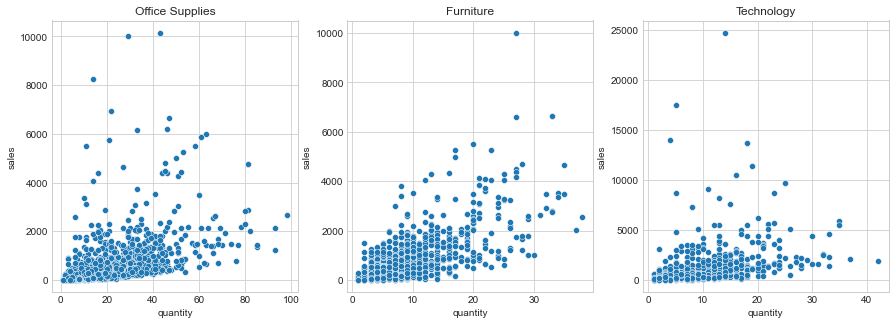

In [127]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))

sns.scatterplot(x = 'quantity', y = 'sales', data = plot_data_1, ax = ax[0])
sns.scatterplot(x = 'quantity', y = 'sales', data = plot_data_2, ax = ax[1])
sns.scatterplot(x = 'quantity', y = 'sales', data = plot_data_3, ax = ax[2])

ax[0].set_title('Office Supplies')
ax[1].set_title('Furniture')
ax[2].set_title('Technology')


plt.show()

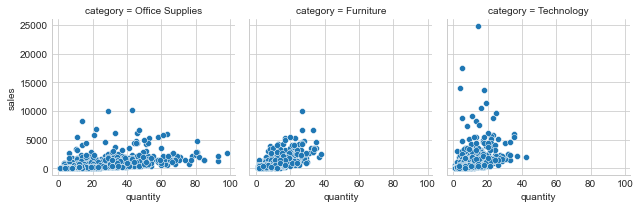

In [128]:
g = sns.FacetGrid(plot_data, col='category')

g.map(sns.scatterplot, "quantity", "sales")

plt.show()

- Lọc ra các đơn hàng bị chuyển chậm hơn 3 ngày

In [131]:
df['ship_days'] = (df['ship_date'] - df['order_date']).dt.days

In [134]:
cond = df['ship_days'] > 3

late_df = df.loc[cond, :]

- Có bao nhiêu đơn như vậy

In [136]:
late_df.shape

(6767, 26)

- Đơn hàng trễ nhất là bao lâu?

In [138]:
df['ship_days'].max()

7

- Vẽ boxplot thời gian chờ cho từng `region`

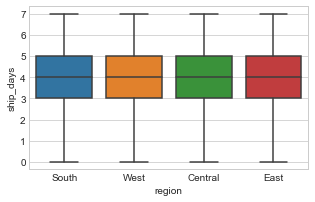

In [146]:
fig, ax = plt.subplots(figsize = (5,3))

sns.boxplot(
    x = 'region',
    y = 'ship_days',
    data = df,
    ax = ax
)

plt.show()

- Vẽ boxplot thời gian chờ cho từng `ship_mode`

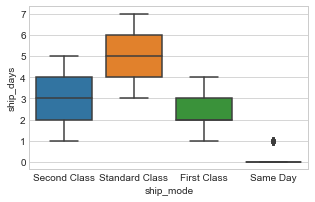

In [147]:
fig, ax = plt.subplots(figsize = (5,3))

sns.boxplot(
    x = 'ship_mode',
    y = 'ship_days',
    data = df,
    ax = ax
)

plt.show()

- Điều chỉnh lại subplots trên sao cho box xếp theo thứ tự `Same Day`, `First Class`, `Second Class`, `Standard Class`

In [150]:
cats = ['Same Day', 'First Class', 'Second Class', 'Standard Class']

df['ship_mode'] = pd.Categorical(df["ship_mode"], categories= cats)

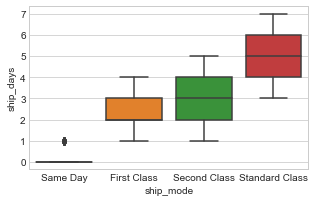

In [151]:
fig, ax = plt.subplots(figsize = (5,3))

sns.boxplot(
    x = 'ship_mode',
    y = 'ship_days',
    data = df,
    ax = ax
)

plt.show()